<a href="https://colab.research.google.com/github/luciana11levy/coder/blob/main/Data_science_Australia_RainII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Predicción lluvias en Australia
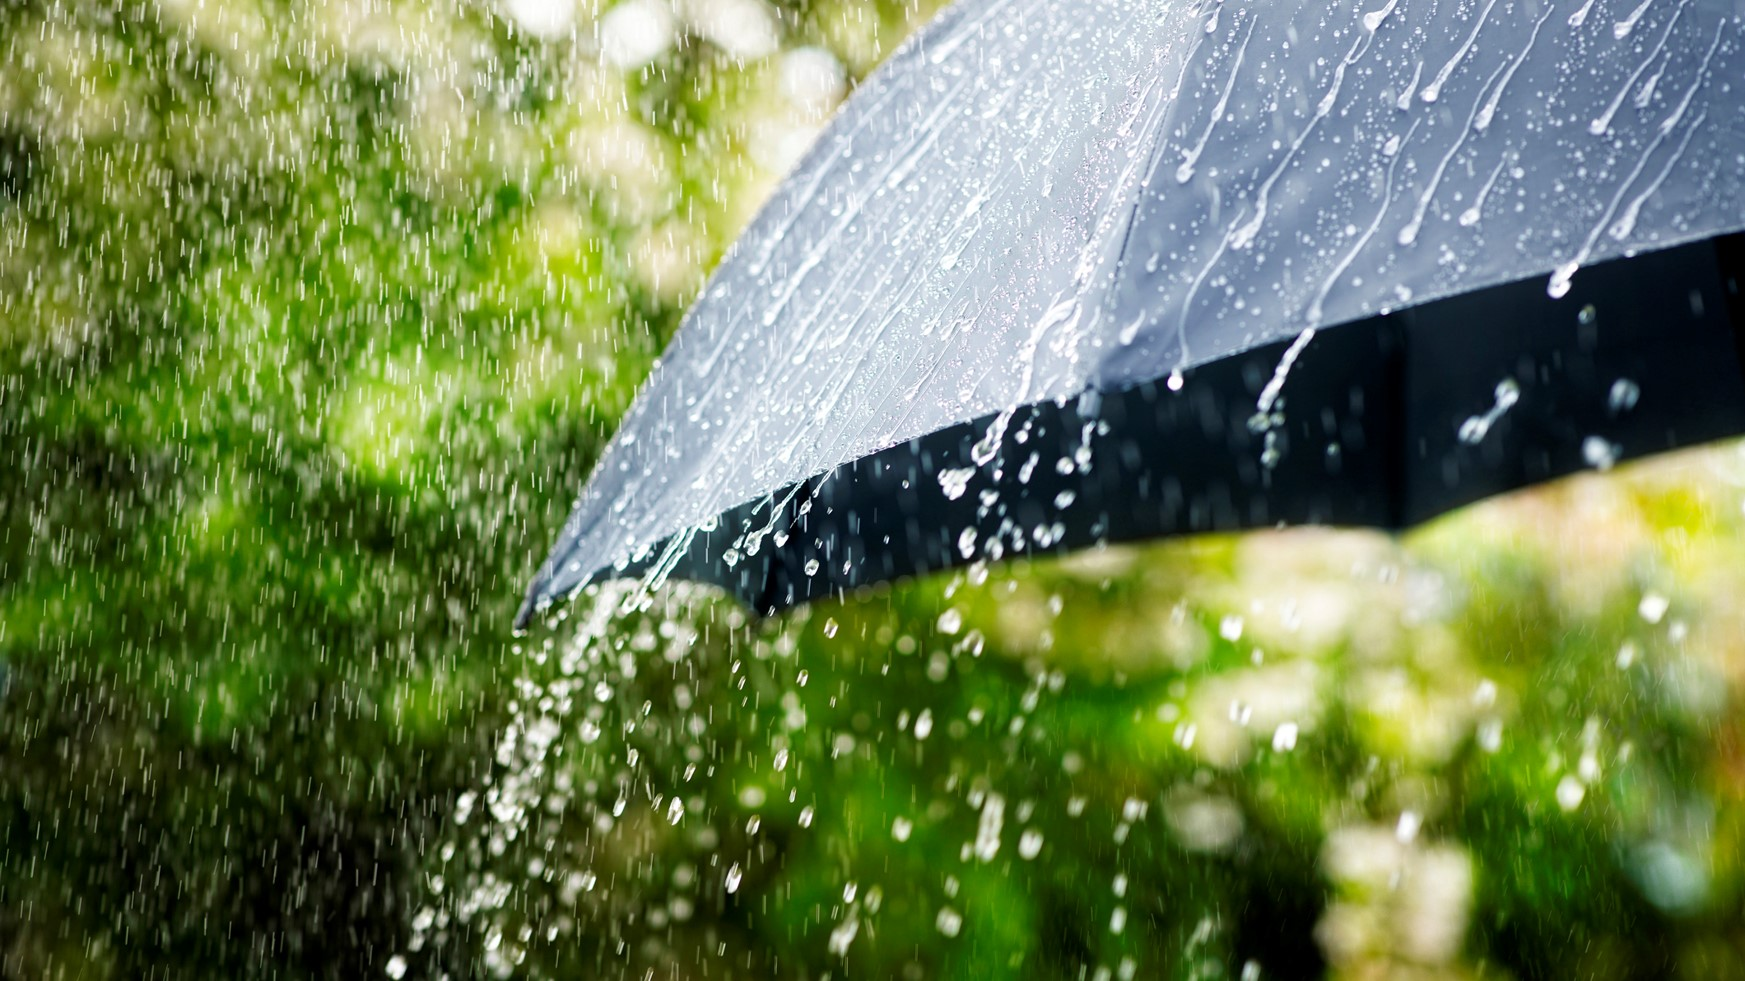


Los datos utilizados en este proyecto se descargaron del conjunto de datos de Kaggle titulado Rain in Australia, que a su vez se obtuvo originalmente de las Observaciones meteorológicas diarias de la Oficina Australiana de Meteorología.





Introducción/ Resumen

La predicción de lluvias es un componente crítico en la gestión de recursos hídricos, la planificación agrícola y la prevención de desastres naturales. Australia es un país caracterizado por eventos climáticos extremos, desde sequías prolongadas hasta intensas lluvias torrenciales, por lo que la capacidad de anticipar precipitaciones sería esencial para reducir impactos económicos, sociales y ambientales.

Muchas son las variables que influyen a la hora de predecir posibles precipitaciones como por ejemplo humedad, temperatura, presión atmosférica, entre otros.


Objetivo: El objetivo principal de este trabajo es analizar el conjunto de datos del dataset elegido para identificar patrones y relaciones de los factores climáticos y ambientales que podrían influir en la probabilidad de lluvia en diferentes regiones de Australia. A través de un análisis exploratorio, la creación de modelos predictivos y la visualización de datos, se pretende predecir la ocurrencia de lluvia en función de diversas características, como la temperatura, la humedad, la presión atmosférica y otros factores climáticos.

Contexto comercial: El sector agrícola y la gestión de recursos hídricos en Australia dependen enormemente de predicciones climáticas precisas, debido a los desafíos que plantea su clima variable y propenso a sequías. La capacidad de predecir con precisión si lloverá o no puede ser de gran ayuda para agricultores en cuanto a la planificación de siembra, riego y cosecha, como así también para la gestión de recursos hídricos y la optimización de embalses y sistemas de irrigación o seguros agrícolas respecto a realizar evaluaciones del riesgo meteorológico para pólizas.

Hipotesis:

*   Hipotesis 1:La temperatura media y la humedad relativa tienen una correlación positiva con la probabilidad de lluvia, es decir, a medida que la temperatura y la humedad aumentan, también aumenta la probabilidad de lluvia.
*   Hipotesis 2: Factores geográficos (ubicación, temporada del año) contribuyen significativamente a la probabilidad de lluvia.
*   Hipotesis de clasificación: Un modelo de aprendizaje supervisado puede predecir con precisión si lloverá al día siguiente en Australia, utilizando los datos meteorológicos proporcionados.





In [143]:
# Importar librerías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import plotly.express as px
import warnings
from sklearn.ensemble import IsolationForest
warnings.filterwarnings("ignore")

In [144]:
# Lectura de csv descargado
df = pd.read_csv('/content/sample_data/weatherAUS.csv.zip')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [145]:
df.shape

(145460, 23)

Hay 23 columnas y 145460 filas en el dataset

In [146]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Definición de cada columna:


*   Date: Fecha de observación de los datos
*   Location: Locación de la estación metereologica donde se recopilaron los datos.
*   MinTemp:Temperatura mínima en las 24 horas hasta las 9 am.
*   MaxTemp:Temperatura máxima en las 24 horas hasta las 9 am.
*   Rainfall: Cantidad de precipitación en mm en las 24 horas.
*   Evaporation: Cantidad estimada de evaporación en mm de un tanque de agua abierto en 24 horas.
*   Sunshine: Cantidad promedio de horas de sol al día.
*   WindGustDir: Dirección del viento con mayor ráfaga durante las últimas 24 horas.
*   WindGustSpeed: Velocidad del viento con mayor ráfaga en km/h durante las últimas 24 horas.
*   WindDir9am: Dirección predominante del viento a las 9:00 AM.
*   WindDir3pm: Dirección predominante del viento a las 3:00 PM.
*   WindSpeed9am: Velocidad promedio del viento en km/h a las 9:00 AM.
*   WindSpeed3pm: Velocidad promedio del viento en km/h a las 3:00 PM.
*   Humidity9am: Humedad relativa (%) a las 9:00 AM.
*   Humidity3pm: Humedad relativa (%) a las 3:00 PM.
*   Pressure9am: Presión atmosférica (hPa) a las 9:00 AM.
*   Pressure3pm: Presión atmosférica (hPa) a las 3:00 PM.
*   Cloud9am:Fracción de cielo cubierto por nubes (de 0 a 9) a las 9:00 AM.
*   Cloud3pm:Fracción de cielo cubierto por nubes (de 0 a 9) a las 3:00 PM.
*   Temp9am: Temperatura en °C a las 9:00 AM.
*   Temp3pm: Temperatura en °C a las 3:00 PM.
*   RainToday:Variable binaria (Yes/No) que indica si llovió al menos 1 mm en las últimas 24 horas.
*   RainTomorrow: Variable objetivo (Yes/No) que indica si lloverá al menos 1 mm al día siguiente.








In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Hay variables categoricas de tipo object y variables numéricas de tipo Float. Se observan que hay datos faltantes para algunas variables.


In [148]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Un análisis estadísitico descriptivo de las variables numéricas respecto a la media, desvío estándar, mínimo, máximo, etc.

In [149]:
df.describe(include = "object")

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


Análisis descriptivo de aquellas variables que son objetos como la dirección del viento, si llovió ese día, si va a llover y el tiempo y ubicación de la toma de datos.

In [150]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


Para observar mejor los datos faltantes se saca porcentaje de los mismos.

In [151]:
(df.isnull().sum() / len(df)) * 100

,0
Date,0.000000
Location,0.000000
MinTemp,1.020899
MaxTemp,0.866905
Rainfall,2.241853
Evaporation,43.166506
Sunshine,48.009762
WindGustDir,7.098859
WindGustSpeed,7.055548
WindDir9am,7.263853


El porcentaje de datos faltantes para las distintas variables. Las variables Sunshine, Evaporation, Cloud 9am y Cloud 3pm son las que mayor datos faltantes tienen (>35%). Las variables de locación y fecha no tienen datos faltantes.

In [152]:
duplicados = df.duplicated()

print(f"Número de duplicados: {duplicados.sum()}")

Número de duplicados: 0


Text(0.5, 1.0, 'Histogramas')

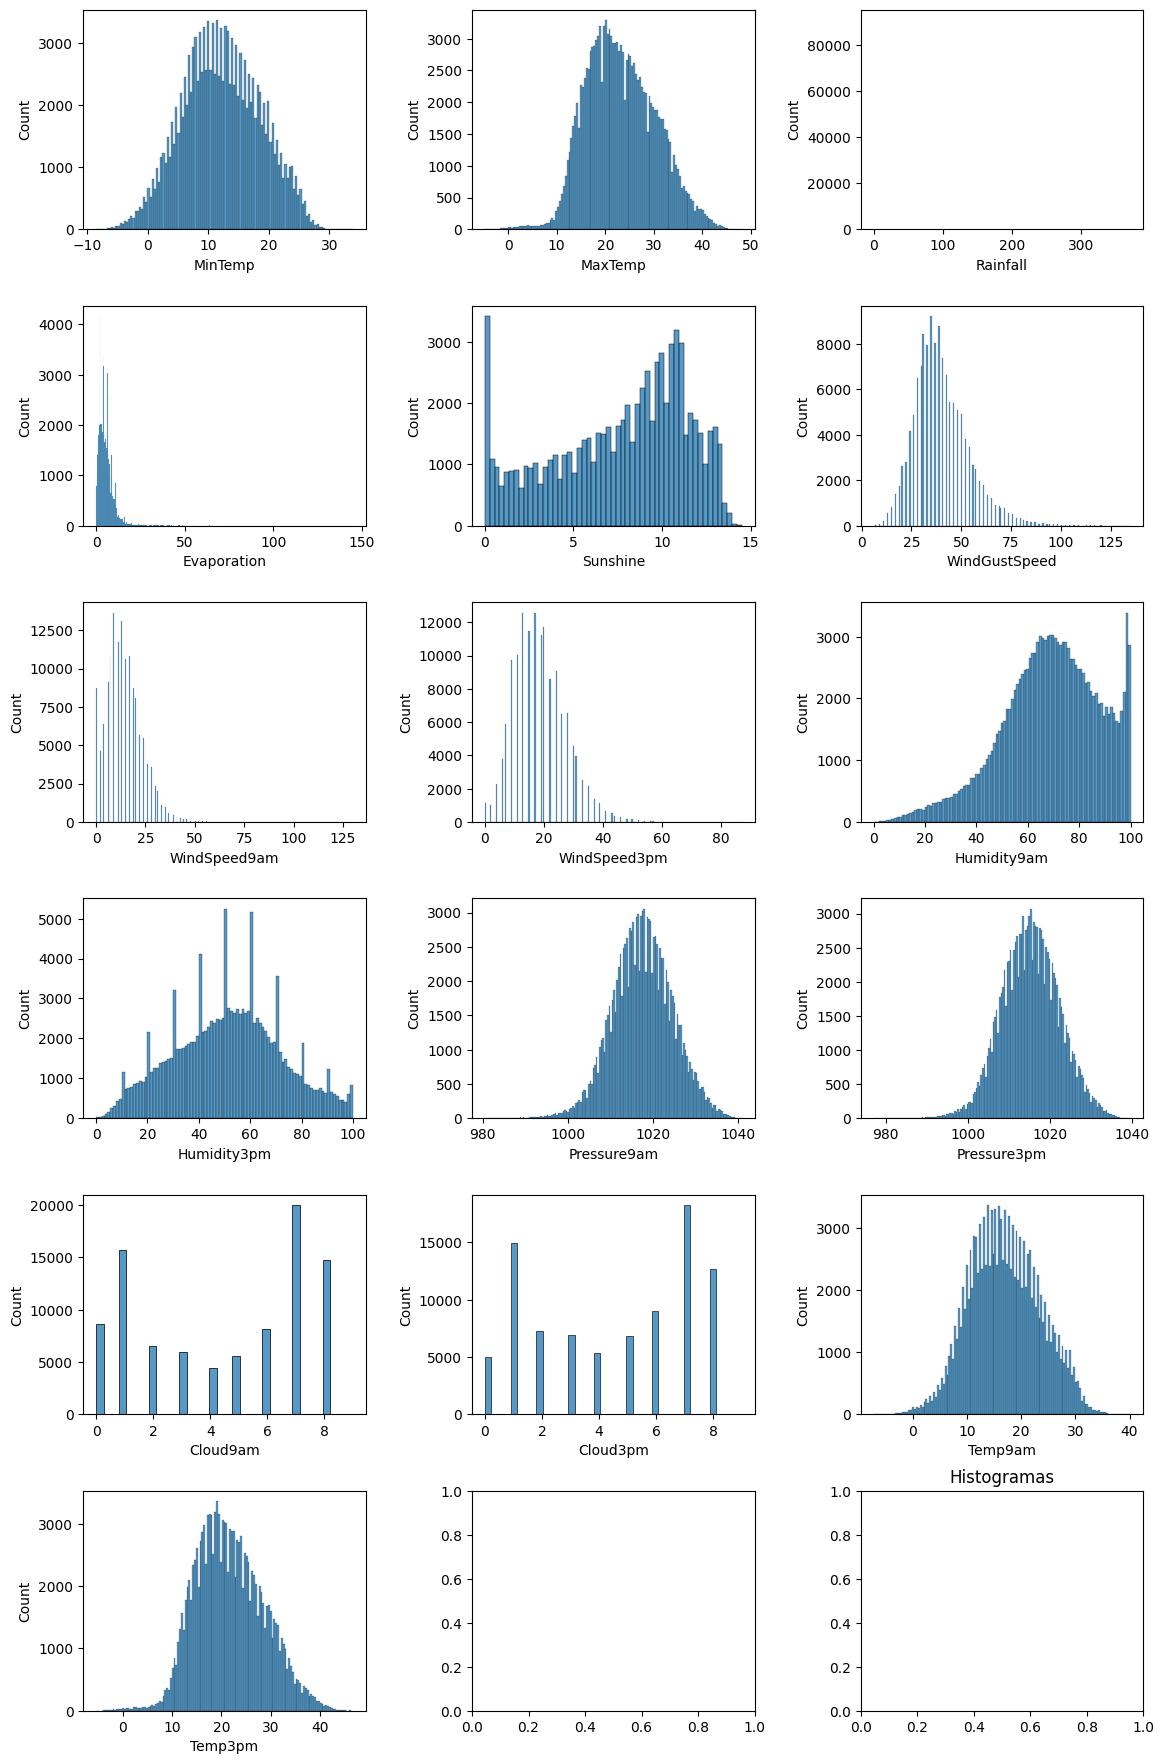

In [153]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
axes = axes.reshape(-1)

continuous = [col for col in df.columns if df[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(df[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.title('Histogramas')



Con los histogramas podemos ver la distribución de las variables numéricas. La mayoría de las variables analizadas sigue una distribución normal. Respecto a la distribución de las precipitaciones hará falta más investigación ya que según el análisis descriptivo estadístico realizado se puede inferir la existencia de muchos datos outliers.

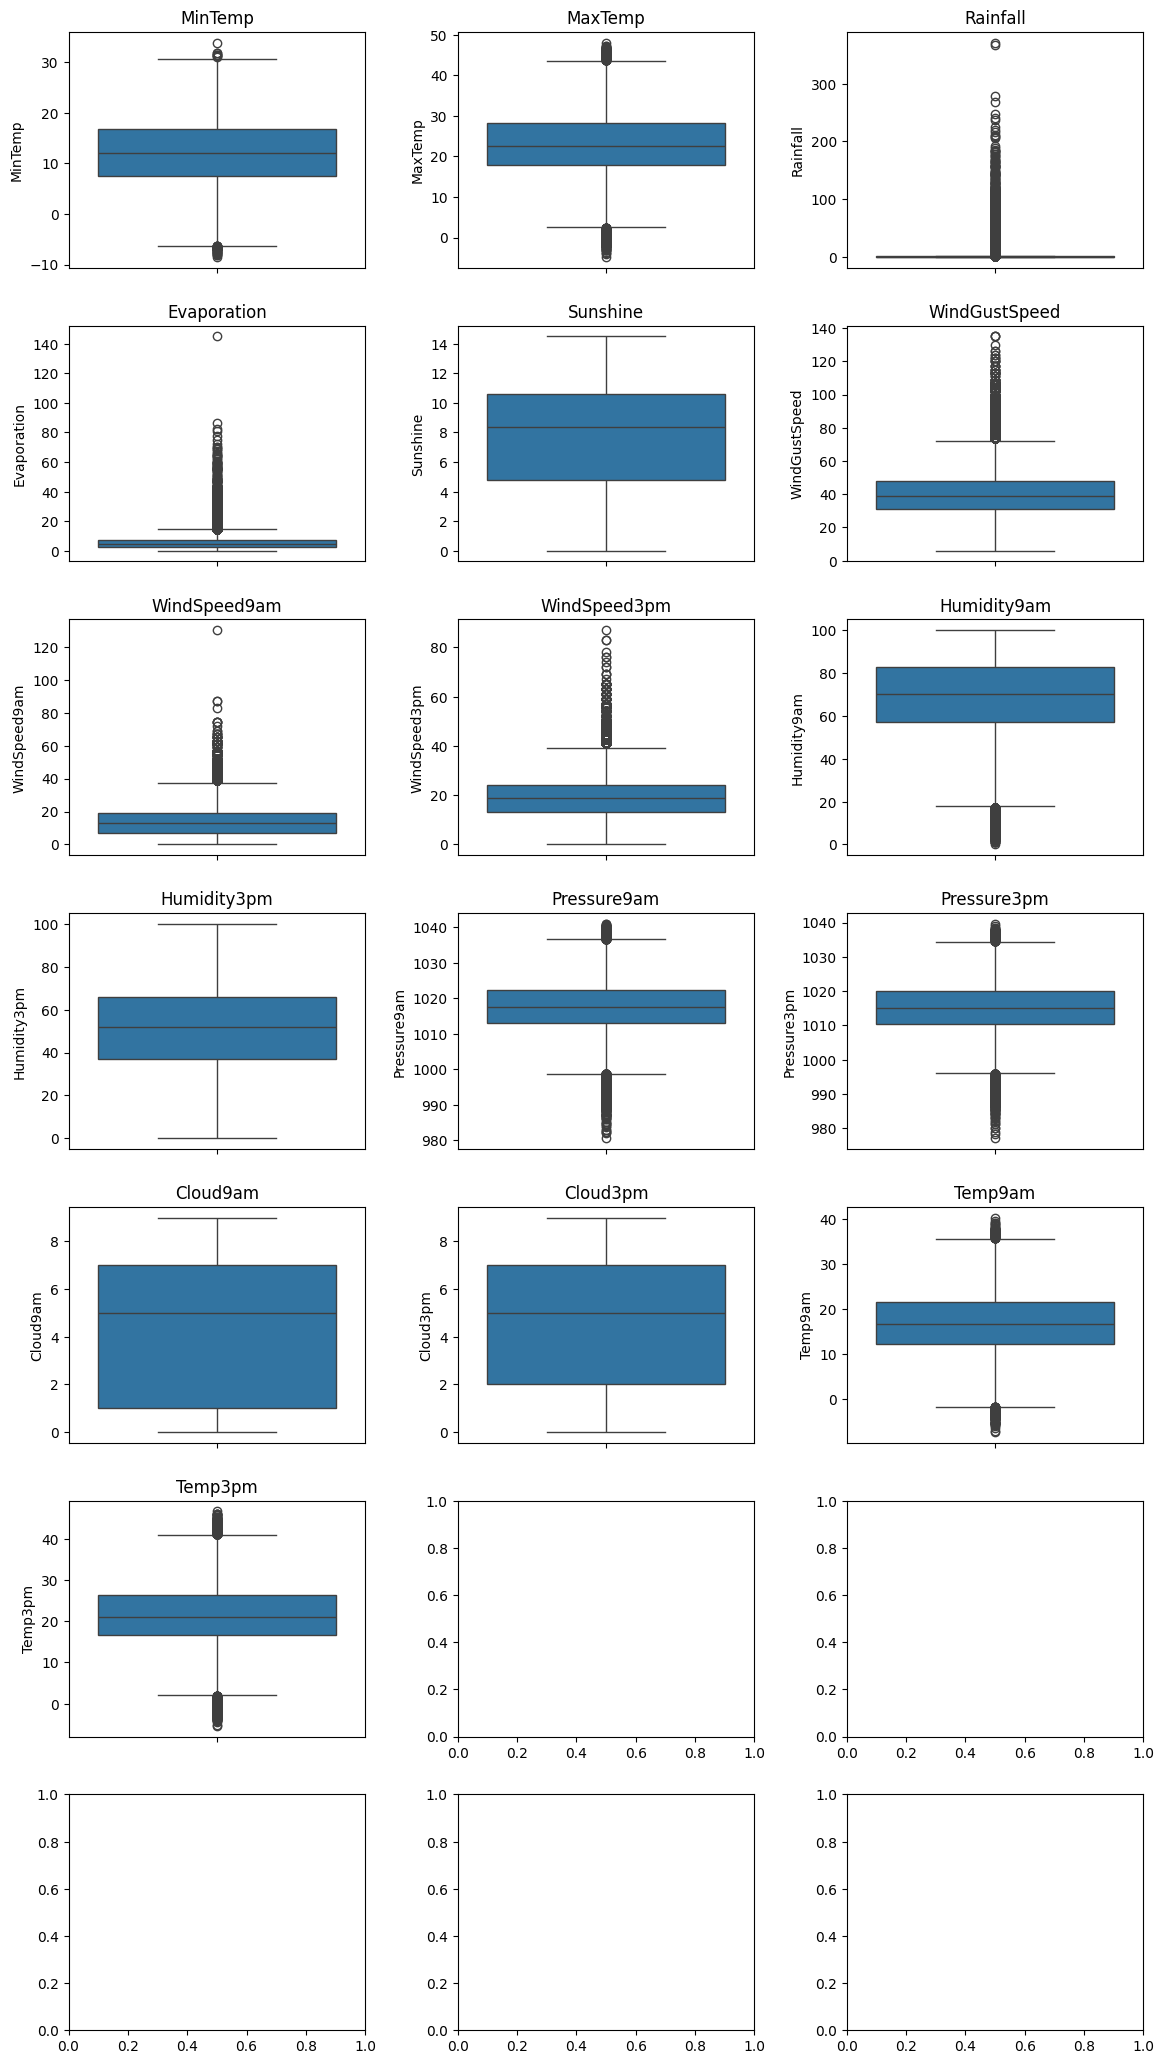

In [154]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12, 21))
axes = axes.reshape(-1)

continuous = [col for col in df.columns if df[col].dtype != object]
for i, col in enumerate(continuous):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

fig.tight_layout(pad=2.0)
plt.show()

Visualización de los outliers para las variables numéricas, no se decide sacarlas ya que cuando se pruebe el modelo de predicción se tendrá en cuenta la influencia de los mismos, si no serán removidos del análsis de datos.
Como era de esperarse por los análisis anteriormente hechos se puede observar que las precipitaciones tienen gran cantidad de datos outliers.

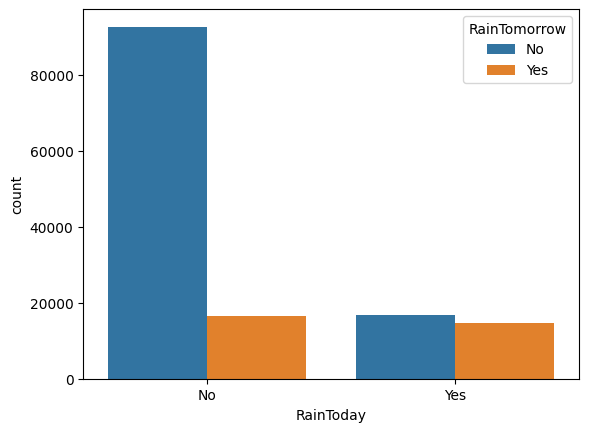

In [155]:
sns.countplot(x = 'RainToday', hue = 'RainTomorrow', data = df);

A partir del gráfico se puede observar la relación que existe entre si llovió hoy y si va a llover mañana, ya que la mayoría de los datos infiere que si llovió hoy, lloverá mañana también. En cambio, si no llovió hoy existen casi las mismas posibilidades de que llueva o no llueva mañana.

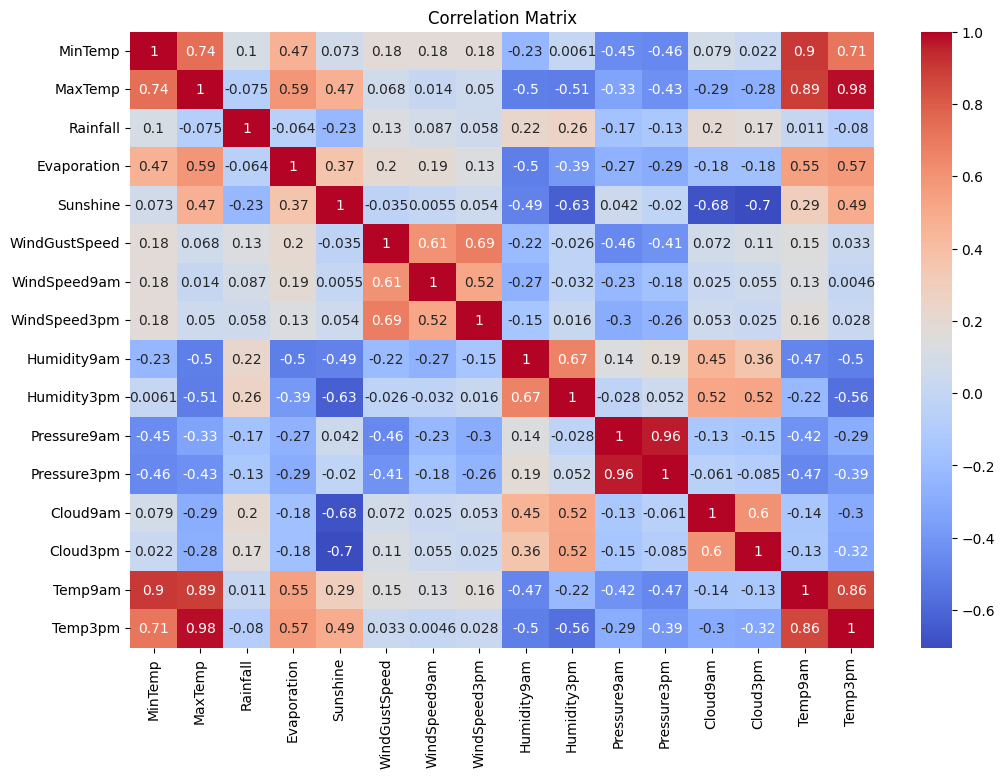

In [156]:
# Se seleccionan solo variable númericas para la correlación
numerical_df = df.select_dtypes(include=['number'])


plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Como se puede observar en el Heatmap las variables que tienen una gran correlacion son:

*   MinTemp con MaxTemp tienen una correlación de 0.74
*   MinTemp con Temp3am tienen una correlación de 0.71
*   MinTemp con Temp9am tienen una correlación de 0.9
*   MaxTemp con Temp3am tienen una correlación de 0.98
*   MaxTemp con Temp9am tienen una correlación de 0.89
*   Pressure9pm con Pressure3pm tienen una correlación de 0.96
*   Temp9am con Temp3am tienen una correlación de 0.86
*   Humidity3pm con Humidity9pm tienen una correlación de 0.67
*   Sunshine con Cloud9am tiene una correlación negativa de -0.68
*   Sunshine con Cloud3pm tiene una correlación negativa de -0.7
*   WindGustSpeed con WindSpeed3pm tiene una correlación de 0.69



In [157]:
# Separar "Date" en "Year"/"Month"/"Day"
df[["Year", "Month", "Day"]] = df["Date"].str.split("-", expand = True)
df["Year"] = df["Year"].astype("int")
df["Month"] = df["Month"].astype("int")
df["Day"] = df["Day"].astype("int")
df.drop("Date", axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


ANOVA
Análisis estadistico para saber si hay diferencias significativas entre la locación y las precipitaciones

In [158]:
groups = [df[df['Location'] == loc]['Rainfall'].dropna() for loc in df['Location'].unique()]
stat, p = f_oneway(*groups)
print(f"F-statistic: {stat}, p-value: {p}")

F-statistic: 53.22478004595979, p-value: 0.0


Hay diferencias significativas entre ambas variables ya que el p valor es menor a 0,05. Por lo que, las precipitaciones van a variar de acuerdo a la locación.

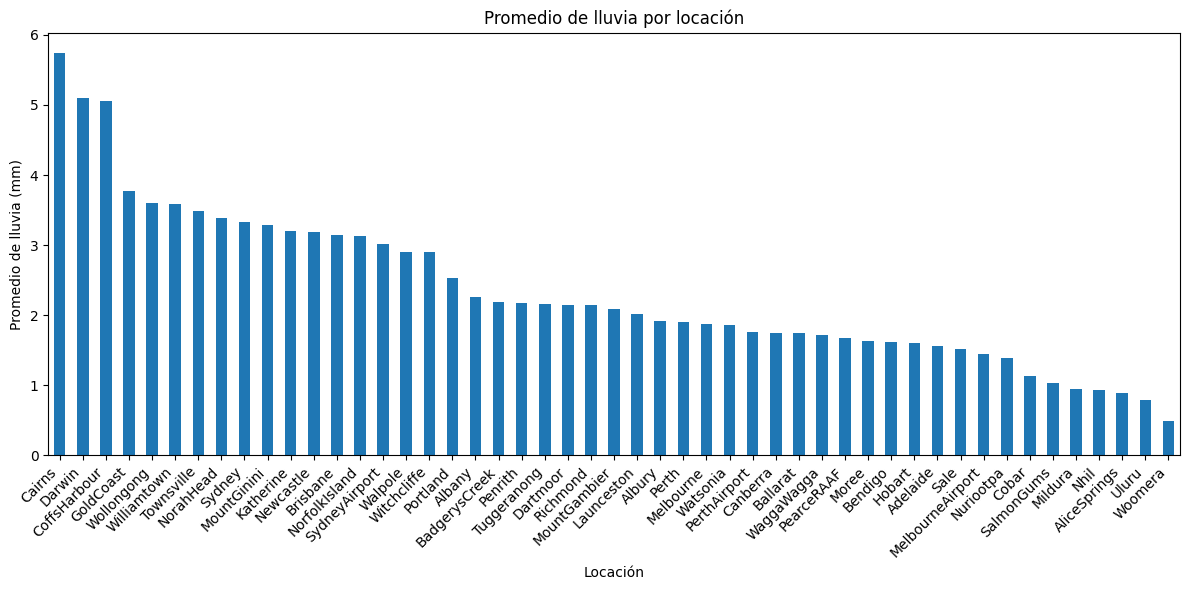

In [159]:
plt.figure(figsize=(12, 6))
df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Promedio de lluvia por locación')
plt.xlabel('Locación')
plt.ylabel('Promedio de lluvia (mm)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

De acuerdo las locaciones se puede observar que hay lugares de Australia donde el promedio de lluvias en mm es mayor respecto a otras locaciones donde el promedio no llega a 1 mm de promedio de lluvia en el periodo de tiempo estudiado.

In [160]:
# Se cambian las variables RainToday y RainTomorrow para que en vez de ser una variable categorica tipo objeto sea númerica.
for column in ['RainToday', 'RainTomorrow']:
  df[column] = df[column].map({'No': 0, 'Yes': 1})

df.value_counts(normalize=True)

Location          MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day
AliceSprings      -5.2     19.4     0.0       4.4          10.2      ENE          33.0           W           E           9.0           17.0          17.0         16.0         1022.5       1017.4       0.0       0.0       6.0      19.0     0.0        0.0           2012  7      7      0.000018
PerthAirport       20.3    33.7     0.0       10.2         5.2       E            57.0           NW          E           6.0           31.0          47.0         50.0         1014.2       1011.8       7.0       3.0       23.6     31.4     0.0        1.0           2015  2      1      0.000018
                   20.2    31.2     0.2       8.2          5.5       SSW          41.0           S           S           17.0          33.0          69.0         50.0         1012.0       1008.8       7.0       7.0       24.9     29.0     0.0        0.0           2011  1      23     0.000018
                           34.2     0.0       9.4          10.4      ENE          59.0           ENE         E           31.0          19.0          42.0         30.0         1009.8       1007.2       2.0       4.0       25.4     32.7     0.0        0.0           2013  1      12     0.000018
                           37.2     0.0       10.2         11.9      E            54.0           ENE         S           24.0          9.0           28.0         26.0         1013.1       1010.4       2.0       3.0       29.0     36.3     0.0        0.0           2009  12     19     0.000018
                                                                                                                                                                                                                                                                                              ...   
MelbourneAirport   8.8     29.2     0.0       7.6          9.4       N            57.0           N           NNE         33.0          44.0          44.0         24.0         1020.3       1014.6       7.0       7.0       19.3     26.4     0.0        0.0           2012  11     20     0.000018
                   8.9     12.2     1.8       0.8          0.6       SW           30.0           WSW         SSE         17.0          15.0          97.0         95.0         1028.5       1027.0       7.0       8.0       9.4      10.6     1.0        1.0           2012  6      9      0.000018
                           12.4     7.0       1.4          0.0       SSE          48.0           S           SSW         26.0          22.0          97.0         89.0         1005.8       1004.0       8.0       8.0       11.8     11.8     1.0        1.0           2016  6      20     0.000018
                           12.7     1.2       4.6          7.9       SW           87.0           WSW         SW          35.0          31.0          73.0         45.0         1012.7       1018.6       2.0       3.0       9.8      12.3     1.0        0.0           2009  8      7      0.000018
Woomera            31.4    46.2     0.0       22.0         12.6      NNW          61.0           NW          N           30.0          22.0          18.0         7.0          1004.4       1003.0       1.0       1.0       37.9     45.3     0.0        0.0           2009  2      7      0.000018
Name: proportion, Length: 56420, dtype: float64

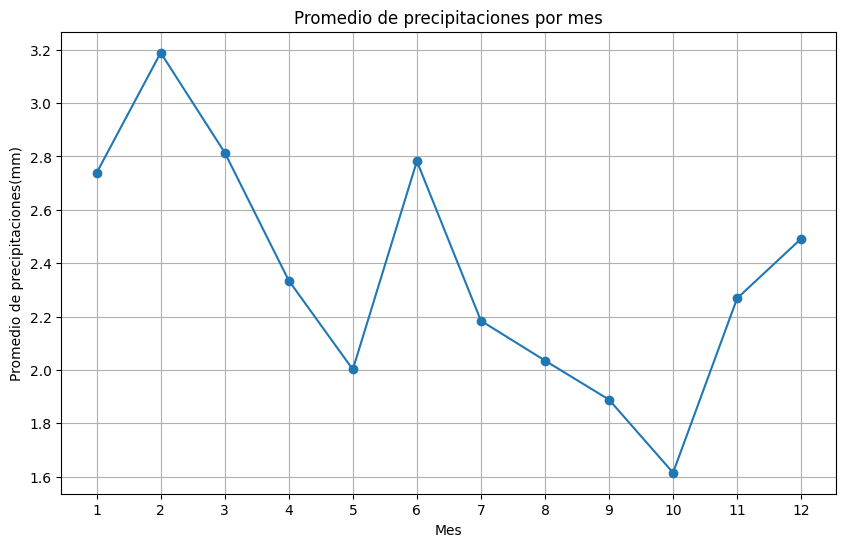

In [161]:

# Agrupar los datos de acuerdo al mes y se calcula el promedio de precipitaciones por mes
monthly_rainfall = df.groupby('Month')['Rainfall'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_rainfall.index, monthly_rainfall.values, marker='o')
plt.xlabel('Mes')
plt.ylabel('Promedio de precipitaciones(mm)')
plt.title('Promedio de precipitaciones por mes')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

Se observa que las lluvias son un fenómeno estacional siendo que para el primer trimestre del año existe un promedio mayor respecto al resto del año.

DATOS FALTANTES


Para los datos faltantes en el caso de variables numéricas se tendra en cuenta el promedio de la misma respecto a la locación que tiene cada estación metereológica ya que se observaron diferencias significativas entre las variables de precipitación y locación.



In [162]:
#  promedio de variables numericas de acuerdo a location

numerical_cols = df.select_dtypes(include=np.number).columns
location_means = df.groupby('Location')[numerical_cols].mean()

location_means

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
Location,,,,,,,,,,,,,,,,,,,,,
Adelaide,12.579505,22.898934,1.566354,5.770364,7.747993,36.499211,9.950125,15.471455,59.701066,44.828105,...,1016.803264,NaN,NaN,16.929046,21.557447,0.222905,0.222654,2012.504228,6.534294,15.719699
Albany,12.948438,20.070998,2.263859,4.213345,6.657460,NaN,12.503189,18.993498,74.805416,67.407917,...,1016.497280,5.191539,4.808072,16.236455,18.411555,0.299072,0.299072,2012.730921,6.410855,15.715461
Albury,9.530604,22.640872,1.914115,NaN,NaN,32.977394,8.211151,14.382965,74.070604,47.869393,...,1015.760752,6.391001,5.406447,14.361135,21.373780,0.204915,0.205247,2012.730921,6.410855,15.715461
AliceSprings,13.142284,29.248420,0.882850,9.026832,9.581944,40.531281,14.727452,18.101053,39.690155,24.131466,...,1012.871913,2.845898,3.251213,21.335658,28.010764,0.080475,0.080501,2012.730921,6.410855,15.715461
BadgerysCreek,11.131719,24.031208,2.193101,NaN,NaN,33.600409,8.051351,14.005404,76.895770,51.381855,...,1015.635120,NaN,NaN,16.571698,22.522698,0.199112,0.199112,2012.779661,6.353274,15.712529
Ballarat,7.367950,18.287266,1.740026,NaN,NaN,44.982719,19.976913,22.766798,81.817820,59.030992,...,1016.271201,5.797915,6.285643,11.672457,16.788365,0.257926,0.257926,2012.730921,6.410855,15.715461
Bendigo,8.593713,21.621746,1.619380,3.851730,NaN,38.850000,12.936100,17.159091,70.545664,46.474325,...,1015.873135,4.400097,4.855379,13.845275,20.249737,0.185234,0.185234,2012.730921,6.410855,15.715461
Brisbane,16.423807,26.448380,3.144891,5.407940,8.081170,28.212881,6.944236,10.998744,64.043587,53.912209,...,1015.099278,3.918546,3.879975,21.841173,24.753461,0.224296,0.224296,2012.504228,6.534294,15.719699
Cairns,21.220467,29.558849,5.742035,6.256891,7.571451,38.031436,15.902929,21.911813,69.936821,61.751645,...,1011.099441,4.560184,4.445196,25.820105,27.909112,0.317938,0.317938,2012.730921,6.410855,15.715461


In [163]:
# Utilizar el promedio calculado por locación para rellenar datos faltantes de variables numericas

for location in df['Location'].unique():

    location_data = df[df['Location'] == location]
    numerical_cols = location_data.select_dtypes(include=np.number).columns


    for col in numerical_cols:
        mean_value = location_means.loc[location, col]
        df.loc[(df['Location'] == location) & (df[col].isnull()), col] = mean_value
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.900000,0.6,NaN,NaN,W,44.000000,W,WNW,...,1007.1,8.000000,5.406447,16.9,21.8,0.0,0.000000,2008.0,12.0,1.0
1,Albury,7.4,25.100000,0.0,NaN,NaN,WNW,44.000000,NNW,WSW,...,1007.8,6.391001,5.406447,17.2,24.3,0.0,0.000000,2008.0,12.0,2.0
2,Albury,12.9,25.700000,0.0,NaN,NaN,WSW,46.000000,W,WSW,...,1008.7,6.391001,2.000000,21.0,23.2,0.0,0.000000,2008.0,12.0,3.0
3,Albury,9.2,28.000000,0.0,NaN,NaN,NE,24.000000,SE,E,...,1012.8,6.391001,5.406447,18.1,26.5,0.0,0.000000,2008.0,12.0,4.0
4,Albury,17.5,32.300000,1.0,NaN,NaN,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.000000,2008.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.400000,0.0,NaN,NaN,E,31.000000,SE,ENE,...,1020.3,5.543103,4.834532,10.1,22.4,0.0,0.000000,2017.0,6.0,21.0
145456,Uluru,3.6,25.300000,0.0,NaN,NaN,NNW,22.000000,SE,N,...,1019.1,5.543103,4.834532,10.9,24.5,0.0,0.000000,2017.0,6.0,22.0
145457,Uluru,5.4,26.900000,0.0,NaN,NaN,N,37.000000,SE,WNW,...,1016.8,5.543103,4.834532,12.5,26.1,0.0,0.000000,2017.0,6.0,23.0
145458,Uluru,7.8,27.000000,0.0,NaN,NaN,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.000000,2017.0,6.0,24.0


In [164]:
# Llenar con la moda los datos faltantes de las variables tipo categoricas

for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [165]:
#Calcular datos faltantes

print(df.isnull().sum())

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      45511
Sunshine         53169
WindGustDir          0
WindGustSpeed     6079
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      12119
Pressure3pm      12119
Cloud9am         34967
Cloud3pm         34967
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64


Se puede observar que aún quedan datos faltantes de variables como Evaporation, Sunshine, Windgustdir, Pressure9am, Pressure3pm, Cloud9am y Cloud3pm, por lo que para abordar esta situación será mejor rellenar con la media de cada variable independientemente de la locación.


In [166]:
# Rellenar datos faltantes con la media

for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].mean())

# Recalcular datos faltantes
print(df.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64


Conclusión:
Se realizó un EDA y Data Wrangling con el dataset elegido. Aun no se ha tenido en cuenta eliminar los outliers ya que si no se deben a un error, eliminarlos o sustituirlos puede modificar las inferencias que se realicen a partir de esa información, debido a que introducen un sesgo, a que disminuyen el tamaño muestral y a que pueden afectar tanto a la distribución como a las varianzas. En caso de ser necesario, se relizará en la segunda parte del trabajo.

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

**Parte 2:**


*   Reducción de la dimensionalidad
*   Detección de outliers
*   Algoritmos de clasificación
*   Métricas



**Reducción de la dimensionalidad de variables categoricas**

In [168]:
pip install prince

In [169]:
from prince import MCA

In [170]:
 df_datacat_OHE=pd.get_dummies(df_datacat)
 df_datacat_OHE

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
145456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
145457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
145458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [171]:
mca = MCA(n_components=2)
mca.fit(df_datacat_OHE)
mca_results = mca.transform(df_datacat_OHE)
mca_results

,0,1
0,0.163835,-0.085759
1,0.197552,-0.040949
2,0.102409,-0.181972
3,-0.146569,0.174376
4,0.117936,0.064932
...,...,...
145455,-0.261900,0.254541
145456,0.017164,0.190612
145457,0.012255,0.131531
145458,-0.163586,0.103640


In [172]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.025,2.50%,2.50%
1,0.023,2.33%,4.83%


In [173]:
mca.column_coordinates(df_datacat_OHE).style.format('{:.0%}')


,0,1
Location_Adelaide__False,-1%,1%
Location_Adelaide__True,48%,-41%
Location_Albany__False,-1%,1%
Location_Albany__True,44%,-62%
Location_Albury__False,-0%,-0%
Location_Albury__True,12%,11%
Location_AliceSprings__False,2%,-1%
Location_AliceSprings__True,-93%,59%
Location_BadgerysCreek__False,0%,0%
Location_BadgerysCreek__True,-11%,-1%


Con esta tabla se muestra cual es el porcentaje de contribución de cada variable para las componentes 0 y 1 respectivamente. Luego de realizar la reducción de dimensionalidad de las variables categóricas es necesario concatenar ambos dataframe, el nuevo con las componentes 0 y 1 y el dataframe de variables numéricas



In [174]:
df_concat = pd.concat([df_datanum, mca_results], axis=1)
df_concat =  df_concat.rename(columns={0: 'componente1', 1:"componente2"})
df_concat

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,componente1,componente2
0,13.4,22.900000,0.6,5.44227,7.636766,44.000000,20.0,24.0,71.0,22.0,...,5.406447,16.9,21.8,0.0,0.000000,2008.0,12.0,1.0,0.163835,-0.085759
1,7.4,25.100000,0.0,5.44227,7.636766,44.000000,4.0,22.0,44.0,25.0,...,5.406447,17.2,24.3,0.0,0.000000,2008.0,12.0,2.0,0.197552,-0.040949
2,12.9,25.700000,0.0,5.44227,7.636766,46.000000,19.0,26.0,38.0,30.0,...,2.000000,21.0,23.2,0.0,0.000000,2008.0,12.0,3.0,0.102409,-0.181972
3,9.2,28.000000,0.0,5.44227,7.636766,24.000000,11.0,9.0,45.0,16.0,...,5.406447,18.1,26.5,0.0,0.000000,2008.0,12.0,4.0,-0.146569,0.174376
4,17.5,32.300000,1.0,5.44227,7.636766,41.000000,7.0,20.0,82.0,33.0,...,8.000000,17.8,29.7,0.0,0.000000,2008.0,12.0,5.0,0.117936,0.064932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,5.44227,7.636766,31.000000,13.0,11.0,51.0,24.0,...,4.834532,10.1,22.4,0.0,0.000000,2017.0,6.0,21.0,-0.261900,0.254541
145456,3.6,25.300000,0.0,5.44227,7.636766,22.000000,13.0,9.0,56.0,21.0,...,4.834532,10.9,24.5,0.0,0.000000,2017.0,6.0,22.0,0.017164,0.190612
145457,5.4,26.900000,0.0,5.44227,7.636766,37.000000,9.0,9.0,53.0,24.0,...,4.834532,12.5,26.1,0.0,0.000000,2017.0,6.0,23.0,0.012255,0.131531
145458,7.8,27.000000,0.0,5.44227,7.636766,28.000000,13.0,7.0,51.0,24.0,...,2.000000,15.1,26.0,0.0,0.000000,2017.0,6.0,24.0,-0.163586,0.103640


In [175]:
# Eliminación de outliers utilizando Isolation Forest

# Crear un Dataframe de variables numéricas sin outliers
df_concat_no_outliers = df_concat.copy()

# Crear una instancia del modelo Isolation Forest
isolation_forest = IsolationForest(n_estimators=500, contamination=0.15)

# Entrenar el modelo con los datos seleccionados
isolation_forest.fit(df_concat_no_outliers)

# Predicción de  anomalias
predictions = isolation_forest.predict(df_concat_no_outliers)

# Identificación de outliers
df_concat_no_outliers['anomaly'] = predictions
outliers = df_concat_no_outliers.loc[df_concat_no_outliers['anomaly'] == -1]

# Eliminación de outliers
df_concat_no_outliers = df_concat_no_outliers[df_concat_no_outliers['anomaly'] == 1]

# Eliminar la columna 'anomaly'
df_concat_no_outliers = df_concat_no_outliers.drop('anomaly', axis=1)

# df_datanum_no_outliers es el dataframe de variables numéricas sin outliers
print(df_concat_no_outliers.head())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6      5.44227  7.636766           44.0   
1      7.4     25.1       0.0      5.44227  7.636766           44.0   
2     12.9     25.7       0.0      5.44227  7.636766           46.0   
3      9.2     28.0       0.0      5.44227  7.636766           24.0   
4     17.5     32.3       1.0      5.44227  7.636766           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Cloud3pm  \
0          20.0          24.0         71.0         22.0  ...  5.406447   
1           4.0          22.0         44.0         25.0  ...  5.406447   
2          19.0          26.0         38.0         30.0  ...  2.000000   
3          11.0           9.0         45.0         16.0  ...  5.406447   
4           7.0          20.0         82.0         33.0  ...  8.000000   

   Temp9am  Temp3pm  RainToday  RainTomorrow    Year  Month  Day  componente1  \
0     16.9     21.8        0.0           0.0  2

In [176]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustSpeed  145460 non-null  float64
 6   WindSpeed9am   145460 non-null  float64
 7   WindSpeed3pm   145460 non-null  float64
 8   Humidity9am    145460 non-null  float64
 9   Humidity3pm    145460 non-null  float64
 10  Pressure9am    145460 non-null  float64
 11  Pressure3pm    145460 non-null  float64
 12  Cloud9am       145460 non-null  float64
 13  Cloud3pm       145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  float64
 17  RainTomorrow   145460 non-nul

In [177]:
df_concat['RainTomorrow'] = df_concat['RainTomorrow'].fillna(-1).astype(int)


Separar datos entre variables dependiente e independiente


In [178]:
X = df_concat.drop(['RainTomorrow'],axis=1)
y = df_concat['RainTomorrow']

# Regresión logistica

In [179]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [182]:

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_resampled, y_train_resampled)


y_pred = logreg_model.predict(X_test)


              precision    recall  f1-score   support

           0       0.92      0.79      0.85     11358
           1       0.51      0.77      0.61      3188

    accuracy                           0.79     14546
   macro avg       0.72      0.78      0.73     14546
weighted avg       0.83      0.79      0.80     14546

[[8979 2379]
 [ 737 2451]]
Accuracy: 0.7857830331362574
Precision: 0.5074534161490684
Recall: 0.7688205771643664
F1 Score: 0.6113744075829384


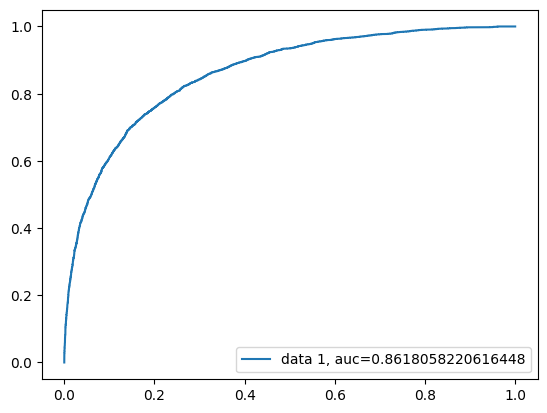

AUC-ROC: 0.8618058220616448


In [186]:
# prompt: poner metricas de logistic regression

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate and print the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate and print other metrics (precision, recall, F1-score)
print(f"Precision: {metrics.precision_score(y_test,y_pred)}")
print(f"Recall: {metrics.recall_score(y_test,y_pred)}")
print(f"F1 Score: {metrics.f1_score(y_test,y_pred)}")


# You can also calculate the AUC-ROC score
y_pred_proba = logreg_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(f"AUC-ROC: {auc}")


In [188]:
# prompt: como hacer hypertuning de parametros

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': uniform(loc=0.1, scale=10),  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
}


# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy', # Scoring metric
    random_state=42,  # Random seed for reproducibility
    n_jobs=-1  # Use all available CPU cores
)


# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_resampled, y_train_resampled)


# Print the best hyperparameters found
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the best model on the test data
best_logreg_model = random_search.best_estimator_
y_pred = best_logreg_model.predict(X_test)

# Print the classification report for the best model
print(classification_report(y_test, y_pred))

# Print the confusion matrix for the best model
print(confusion_matrix(y_test, y_pred))

# Calculate and print the accuracy score for the best model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# ... (rest of the evaluation metrics)


KeyboardInterrupt: 